In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import pylab
import math
import random
import sklearn


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from pandas.api.types import is_numeric_dtype

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import KFold, StratifiedKFold, ShuffleSplit


from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import r2_score
from math import sqrt

from catboost import CatBoostRegressor
from catboost import Pool, cv

%matplotlib inline

In [2]:
df = pd.read_excel('D:\Стас\Ученье - Свет\Оценка\Аспирантура\Видео по NN, Data mining, ABC и т.д\Распределение Гаусса, регрессия\Python\!Наработки\Квартиры Ектб/выбросы.xlsx', sheet_name = 0)
df

,Цена,Прогноз_catb,Прогноз_NN,Прогноз_MLP,Прогноз_Stack,Mean_catb_NN,Балл_2,Метка,err,MAE,...,Этаж,Пассажирский лифт,Двор,Парковка,Высота потолков,В доме,Грузовой лифт,Техника,Тёплый пол,Запланирован снос
0,12200000,1.274182e+07,12741835.0,1.307682e+07,1.283019e+07,1.274183e+07,10.032591,0,2662.039991,-5.418159e+05,...,16 из 16,2,"детская площадка, спортивная площадка",подземная,NaN,NaN,NaN,NaN,NaN,NaN
1,3672000,3.426564e+06,3788324.5,3.860409e+06,3.441493e+06,3.607444e+06,9.063572,0,-6012.449904,2.454361e+05,...,3 из 4,NaN,NaN,NaN,3 м,NaN,NaN,NaN,NaN,NaN
2,4950000,4.333199e+06,4349611.0,4.360099e+06,4.266249e+06,4.341405e+06,9.062723,0,22922.841278,6.168008e+05,...,1 из 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5890000,6.521101e+06,6356236.0,6.769846e+06,6.392300e+06,6.438668e+06,9.033269,0,3774.725466,-6.311007e+05,...,3 из 6,NaN,NaN,открытая во дворе,2.7 м,газ,NaN,NaN,NaN,NaN
4,5390000,5.689062e+06,5661739.5,5.624131e+06,5.572903e+06,5.675401e+06,10.424938,0,-30742.074763,-2.990624e+05,...,10 из 23,1,закрытая территория,NaN,NaN,NaN,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7539,17800000,1.686068e+07,17103258.0,1.725586e+07,1.705123e+07,1.698197e+07,10.303444,0,894.780267,9.393182e+05,...,13 из 20,2,"закрытая территория, детская площадка",подземная,2.8 м,NaN,1,"холодильник, стиральная машина, посудомоечная...",есть,NaN
7540,6100000,5.654543e+06,5682841.5,5.683466e+06,5.534101e+06,5.668692e+06,8.972290,0,-6026.088792,4.454575e+05,...,3 из 5,нет,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7541,9826880,8.059268e+06,8694407.0,8.440710e+06,8.355624e+06,8.376838e+06,10.164845,0,-1919.172274,1.767612e+06,...,8 из 11,2,детская площадка,подземная,NaN,газ,NaN,"кондиционер, холодильник, посудомоечная машина",NaN,NaN
7542,4350000,4.590546e+06,4197503.5,4.196797e+06,4.620189e+06,4.394025e+06,10.062153,0,-15178.908880,-2.405455e+05,...,10 из 16,1,"закрытая территория, детская площадка, спорти...",за шлагбаумом во дворе,2.7 м,консьерж,2,NaN,NaN,NaN


In [3]:
def graph(data):
    #data = df_isofor
    fig = plt.figure(figsize = (20, 25))
    fig.subplots_adjust(hspace = 0.5)
    #left=None, bottom=None, right=None, top=None, wspace=None, hspace=None

    plt.subplot(5, 3, 1)
    f1 = sns.histplot(x = 'ОПлощадь',
                      #hue = 'credit_risk',
                      #multiple = 'dodge',
                      color = 'b',
                      #bins = 11,
                      #element = "step",
                      alpha = 0.3,
                      data = data
                      )
    #f1.set(xlabel = None)
    f1.set_xlabel('ОПлощадь', fontsize = 12)
    f1.set_ylabel('Count', fontsize = 12)

    plt.subplot(5, 3, 2)
    f2 = sns.histplot(x = 'Этажность_1',
                      #hue = 'credit_risk',
                      #multiple = 'dodge',
                      color = 'b',
                      #bins = 11,
                      #element = "step",
                      alpha = 0.3,
                      data = data
                      )
    f2.set_xlabel('Этажность', fontsize = 12)
    #f2.set_ylabel('Count', fontsize = 12)
    f2.set(ylabel = None)

    plt.subplot(5, 3, 3)
    f3 = sns.histplot(x = 'ХВ',
                      #hue = 'credit_risk',
                      #multiple = 'dodge',
                      color = 'b',
                      #bins = 11,
                      #element = "step",
                      alpha = 0.3,
                      data = data
                      )
    #f1.set(xlabel = None)
    f3.set_xlabel('Возраст', fontsize = 12)
    #f3.set_ylabel('Count', fontsize = 12)
    f3.set(ylabel = None)

    plt.subplot(5, 3, 4)
    f4 = sns.histplot(x = 'Этаж_4',
                      #multiple = 'dodge',
                      color = 'b',
                      #bins = 11,
                      #element = "step",
                      alpha = 0.3,
                      shrink = 0.8,
                      data = data
                      )
    f4.set_xlabel('Этаж', fontsize = 12)
    plt.xticks(rotation = 30)
    f4.set_ylabel('Count', fontsize = 12)

    plt.subplot(5, 3, 5)
    f5 = sns.histplot(x = 'Ремонт',
                      #multiple = 'dodge',
                      color = 'b',
                      #bins = 11,
                      #element = "step",
                      alpha = 0.3,
                      shrink = 0.8,
                      data = data
                      )
    f5.set_xlabel('Ремонт', fontsize = 10)
    plt.xticks(rotation = 30)
    #f5.set_ylabel('Count', fontsize = 10)
    f5.set(ylabel = None)

    plt.subplot(5, 3, 6)
    f6 = sns.histplot(x = 'Материал_2',
                      #multiple = 'dodge',
                      color = 'b',
                      #bins = 11,
                      #element = "step",
                      alpha = 0.3,
                      shrink = 0.8,
                      data = data
                      )
    f6.set_xlabel('Материал стен', fontsize = 10)
    #plt.xticks(rotation = 30)
    #f6.set_ylabel('Count', fontsize = 10)
    f6.set(ylabel = None)

    plt.subplot(5, 3, 7)
    f7 = sns.histplot(x = 'Многоуровневая',
                      #multiple = 'dodge',
                      color = 'b',
                      #bins = 11,
                      #element = "step",
                      alpha = 0.3,
                      shrink = 0.8,
                      data = data
                      )
    f7.set_xlabel('Уровень', fontsize = 10)
    #plt.xticks(rotation = 30)
    f7.set_ylabel('Count', fontsize = 10)

    plt.subplot(5, 3, 8)
    f8 = sns.histplot(x = 'Терраса',
                      #multiple = 'dodge',
                      color = 'b',
                      #bins = 11,
                      #element = "step",
                      alpha = 0.3,
                      shrink = 0.8,
                      data = data
                      )
    f8.set_xlabel('Терраса', fontsize = 10)
    #plt.xticks(rotation = 30)
    #f8.set_ylabel('Count', fontsize = 10)
    f8.set(ylabel = None)

    plt.subplot(5, 3, 9)
    f9 = sns.histplot(x = 'ЖК',
                      #multiple = 'dodge',
                      color = 'b',
                      #bins = 11,
                      #element = "step",
                      alpha = 0.3,
                      shrink = 0.8,
                      data = data
                      )
    f9.set_xlabel('ЖК', fontsize = 10)
    #plt.xticks(rotation = 30)
    #f9.set_ylabel('Count', fontsize = 10)
    f9.set(ylabel = None)

    plt.subplot(5, 2, 7) #7 из расчета, что в одну страку входит 2 графика
    f10 = sns.histplot(x = 'Раст_центр_2',
                      #multiple = 'dodge',
                      color = 'b',
                      #bins = 11,
                      #element = "step",
                      alpha = 0.3,
                      shrink = 0.8,
                      data = data
                      )
    f10.set_xlabel('Раст до центр', fontsize = 10)
    plt.xticks(rotation = 30)
    #f10.set_ylabel('Count', fontsize = 10)
    #f10.set(ylabel = None)

    plt.subplot(5, 2, 8) #8 из расчета, что в одну страку входит 2 графика
    f11 = sns.histplot(x = 'Раст_метро_2',
                      #multiple = 'dodge',
                      color = 'b',
                      #bins = 11,
                      #element = "step",
                      alpha = 0.3,
                      shrink = 0.8,
                      data = data
                      )
    f11.set_xlabel('Раст до метро', fontsize = 10)
    plt.xticks(rotation = 30)
    #f11.set_ylabel('Count', fontsize = 10)
    f11.set(ylabel = None)

    plt.subplot(5, 1, 5) #5 из расчета, что в одну страку входит 1 график
    f11 = sns.histplot(x = 'Район_2',
                      #multiple = 'dodge',
                      color = 'b',
                      #bins = 11,
                      #element = "step",
                      alpha = 0.3,
                      shrink = 0.8,
                      data = data
                      )
    f11.set_xlabel('Район', fontsize = 10)
    plt.xticks(rotation = 30)
    #f11.set_ylabel('Count', fontsize = 10)
    f11.set(ylabel = None)

    #fig.tight_layout(pad = 1)

    # fig.legend([f1, f2, f3],
    #            labels = label_list,
    #            loc = 'upper right',
    #            borderaxespad = 0.1,
    #            fontsize = 10
    #           )

    return plt.show()

In [ ]:
#гистограмма ошибок
#зависимость ошибок от цены и площади
#shap - влияние факторов на цену

# MAE

Всего: 7544
MAE (2 млн): 310
MAE (2 млн): 0.041


C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


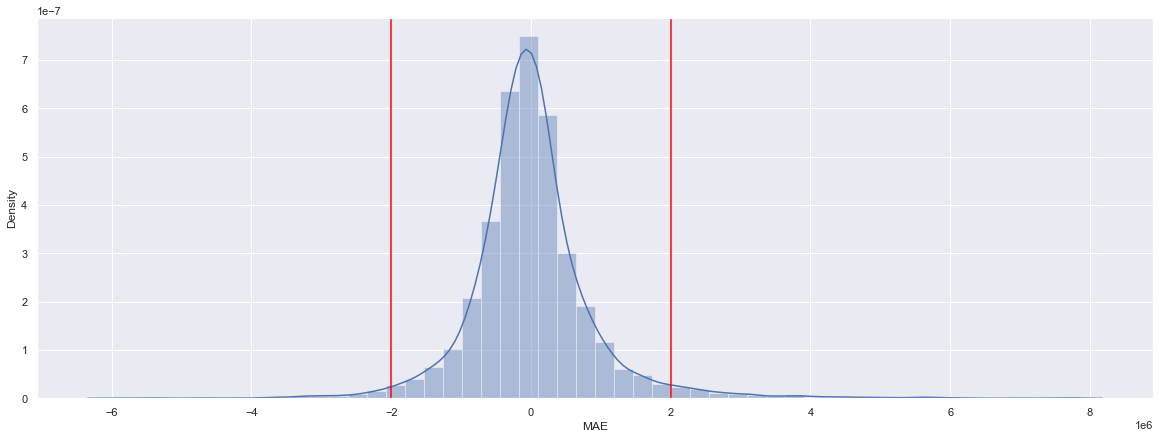

In [12]:
g = 2000000

print('Всего:', len(df['MAE']))
print('MAE (2 млн):', len(df[(df['MAE'] < -g) | (df['MAE'] > g)]))
print('MAE (2 млн):', round(len(df[(df['MAE'] < -g) | (df['MAE'] > g)]) / len(df['MAE']), 3))

sns.set()
plt.figure(figsize = (20, 7))
sns.distplot(df['MAE'])

plt.axvline(-g, color = 'red')
plt.axvline(g, color = 'red')

Всего: 7544
MAE (4 млн): 43
MAE (4 млн): 0.006


C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


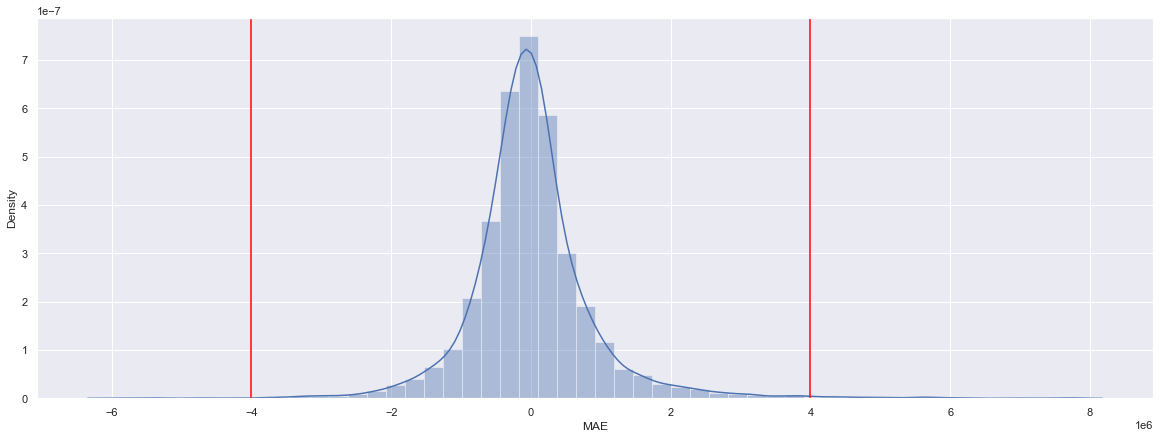

In [16]:
g = 4000000

print('Всего:', len(df['MAE']))
print('MAE (4 млн):', len(df[(df['MAE'] < -g) | (df['MAE'] > g)]))
print('MAE (4 млн):', round(len(df[(df['MAE'] < -g) | (df['MAE'] > g)]) / len(df['MAE']), 3))

sns.set()
plt.figure(figsize = (20, 7))
sns.distplot(df['MAE'])

plt.axvline(-g, color = 'red')
plt.axvline(g, color = 'red')

In [21]:
g = 2000000
df_1 = df[(df['MAE'] < -g) | (df['MAE'] > g)]
len(df_1)

310

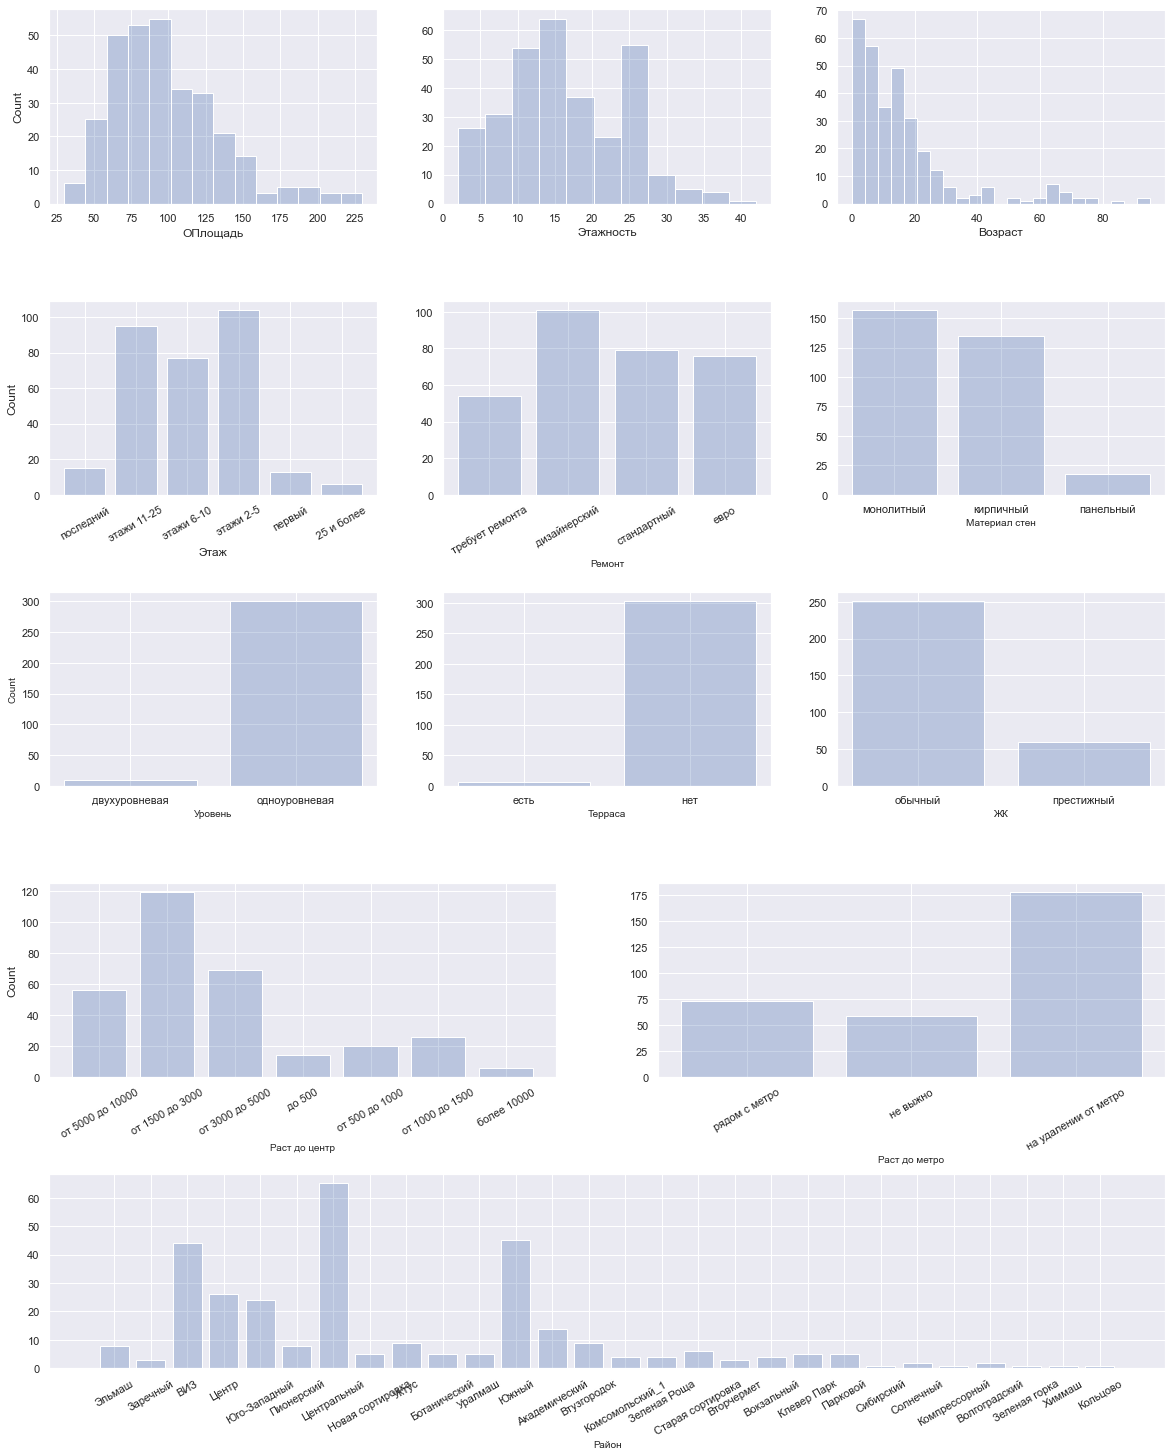

In [22]:
graph(df_1)

In [23]:
g = 4000000
df_2 = df[(df['MAE'] < -g) | (df['MAE'] > g)]
len(df_2)

43

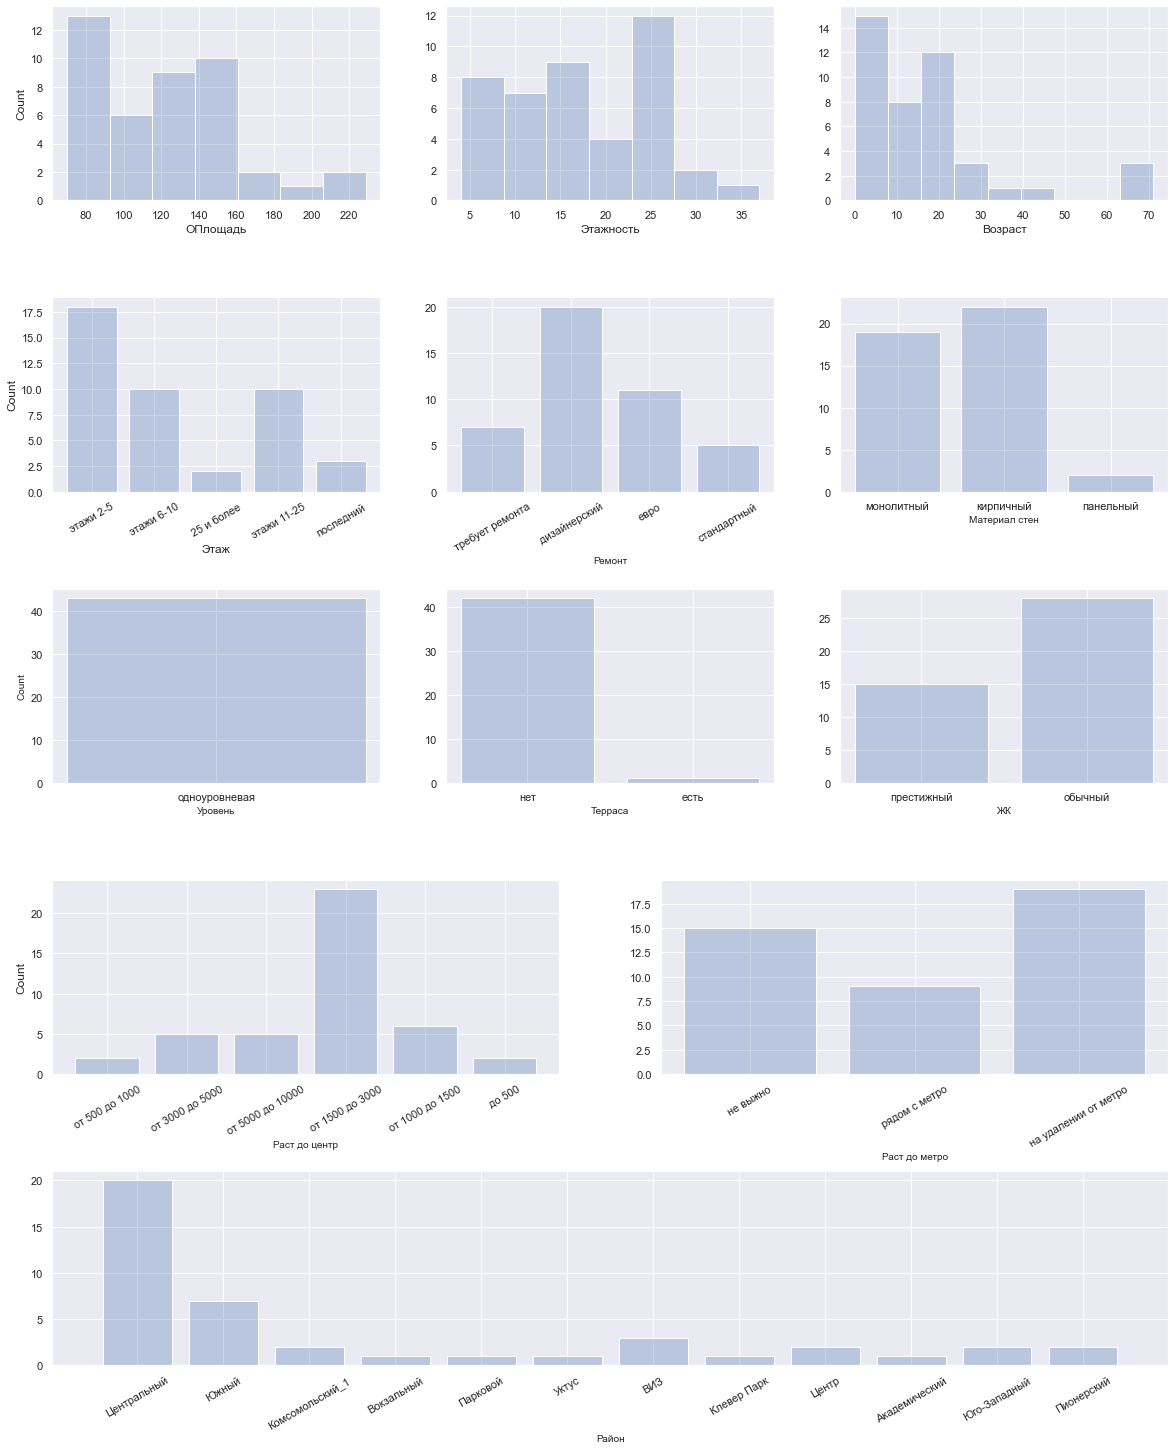

In [24]:
graph(df_2)

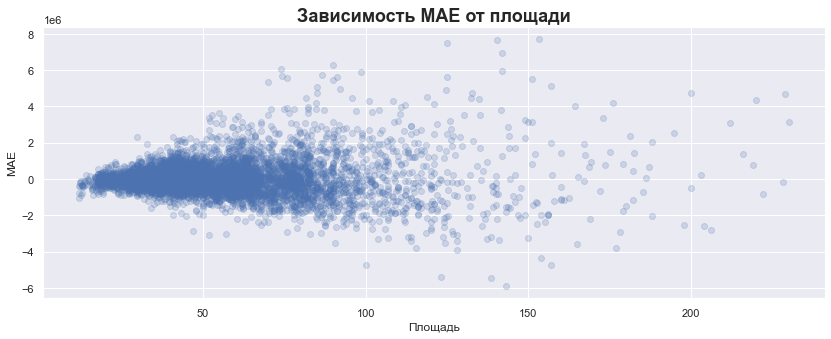

In [25]:
plt.figure(figsize = (14, 5))
plt.scatter(x = df['ОПлощадь'], y = df['MAE'], alpha = 0.2)
#plt.axhline(y = 10, color = 'r', linestyle = '-', alpha = 0.7)
#plt.yticks(np.arange(0, 110, 10))
#plt.xticks(np.arange(1880, 2030, 10))
plt.xlabel('Площадь')
plt.ylabel('MAE')
plt.title('Зависимость MAE от площади', fontweight = 'bold', fontsize = 18)
plt.show()

Чуть в большей степени модель недооценивает квартиры.

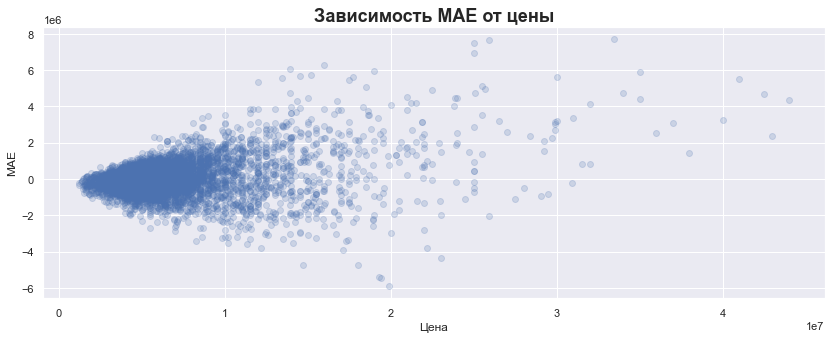

In [32]:
plt.figure(figsize = (14, 5))
plt.scatter(x = df['Цена'], y = df['MAE'], alpha = 0.2)
#plt.axhline(y = 10, color = 'r', linestyle = '-', alpha = 0.7)
#plt.yticks(np.arange(0, 110, 10))
#plt.xticks(np.arange(1880, 2030, 10))
plt.xlabel('Цена')
plt.ylabel('MAE')
plt.title('Зависимость MAE от цены', fontweight = 'bold', fontsize = 18)
plt.show()

# MAPE

Всего: 7544
MAE (0.25): 265
MAE (0.25): 0.035


C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


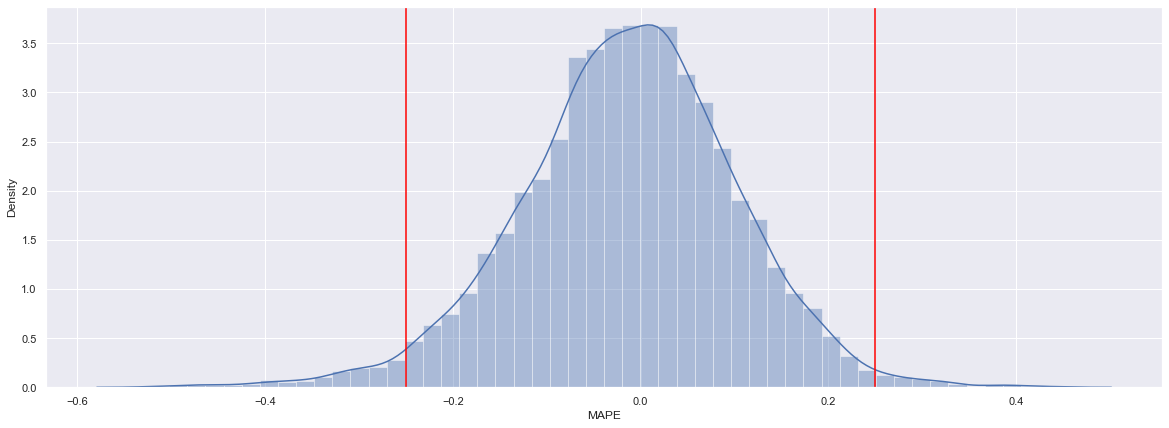

In [19]:
g = 0.25

print('Всего:', len(df['MAPE']))
print('MAE (0.25):', len(df[(df['MAPE'] < -g) | (df['MAPE'] > g)]))
print('MAE (0.25):', round(len(df[(df['MAPE'] < -g) | (df['MAPE'] > g)]) / len(df['MAPE']), 3))

sns.set()
plt.figure(figsize = (20, 7))
sns.distplot(df['MAPE'])

plt.axvline(-g, color = 'red')
plt.axvline(g, color = 'red')

Всего: 7544
MAE (0.2): 27
MAE (0.2): 0.004


C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


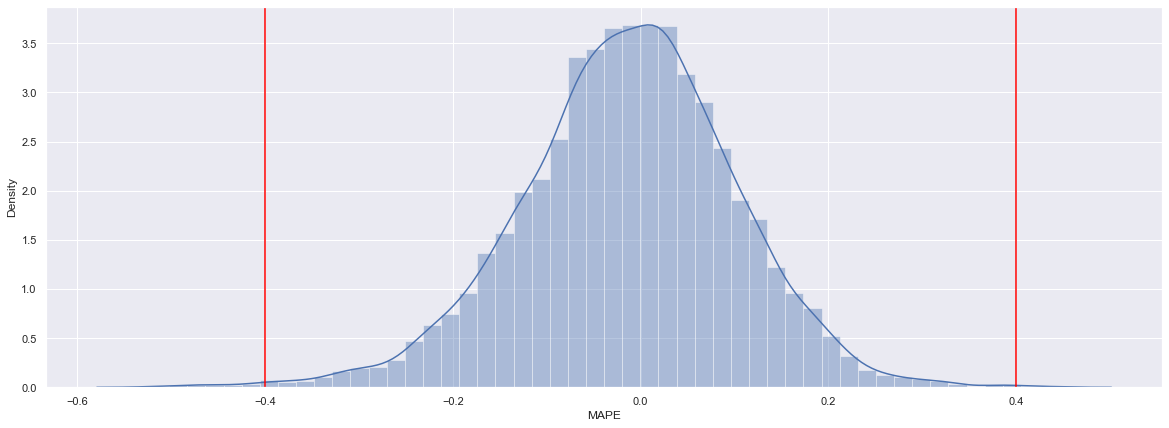

In [18]:
g = 0.4

print('Всего:', len(df['MAPE']))
print('MAE (0.2):', len(df[(df['MAPE'] < -g) | (df['MAPE'] > g)]))
print('MAE (0.2):', round(len(df[(df['MAPE'] < -g) | (df['MAPE'] > g)]) / len(df['MAPE']), 3))

sns.set()
plt.figure(figsize = (20, 7))
sns.distplot(df['MAPE'])

plt.axvline(-g, color = 'red')
plt.axvline(g, color = 'red')

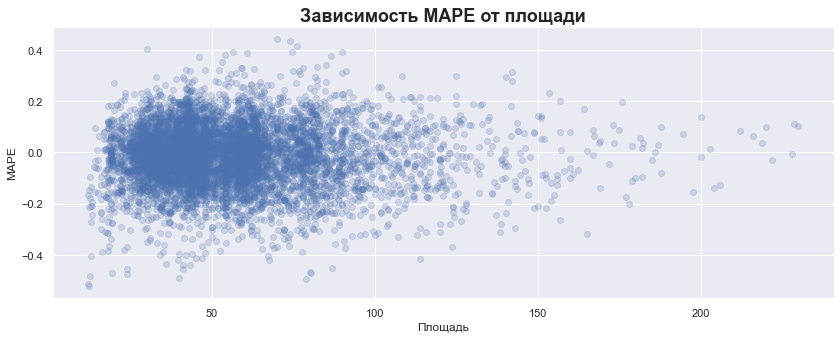

In [26]:
plt.figure(figsize = (14, 5))
plt.scatter(x = df['ОПлощадь'], y = df['MAPE'], alpha = 0.2)
#plt.axhline(y = 10, color = 'r', linestyle = '-', alpha = 0.7)
#plt.yticks(np.arange(0, 110, 10))
#plt.xticks(np.arange(1880, 2030, 10))
plt.xlabel('Площадь')
plt.ylabel('MAPE')
plt.title('Зависимость MAPE от площади', fontweight = 'bold', fontsize = 18)
plt.show()

In [30]:
df_3 = df[(df['MAE'] < -2000000) | (df['MAE'] > 2000000)]
df_3 = df_3[(df_3['MAPE'] < -0.25) | (df_3['MAPE'] > 0.25)]
len(df_3)

101

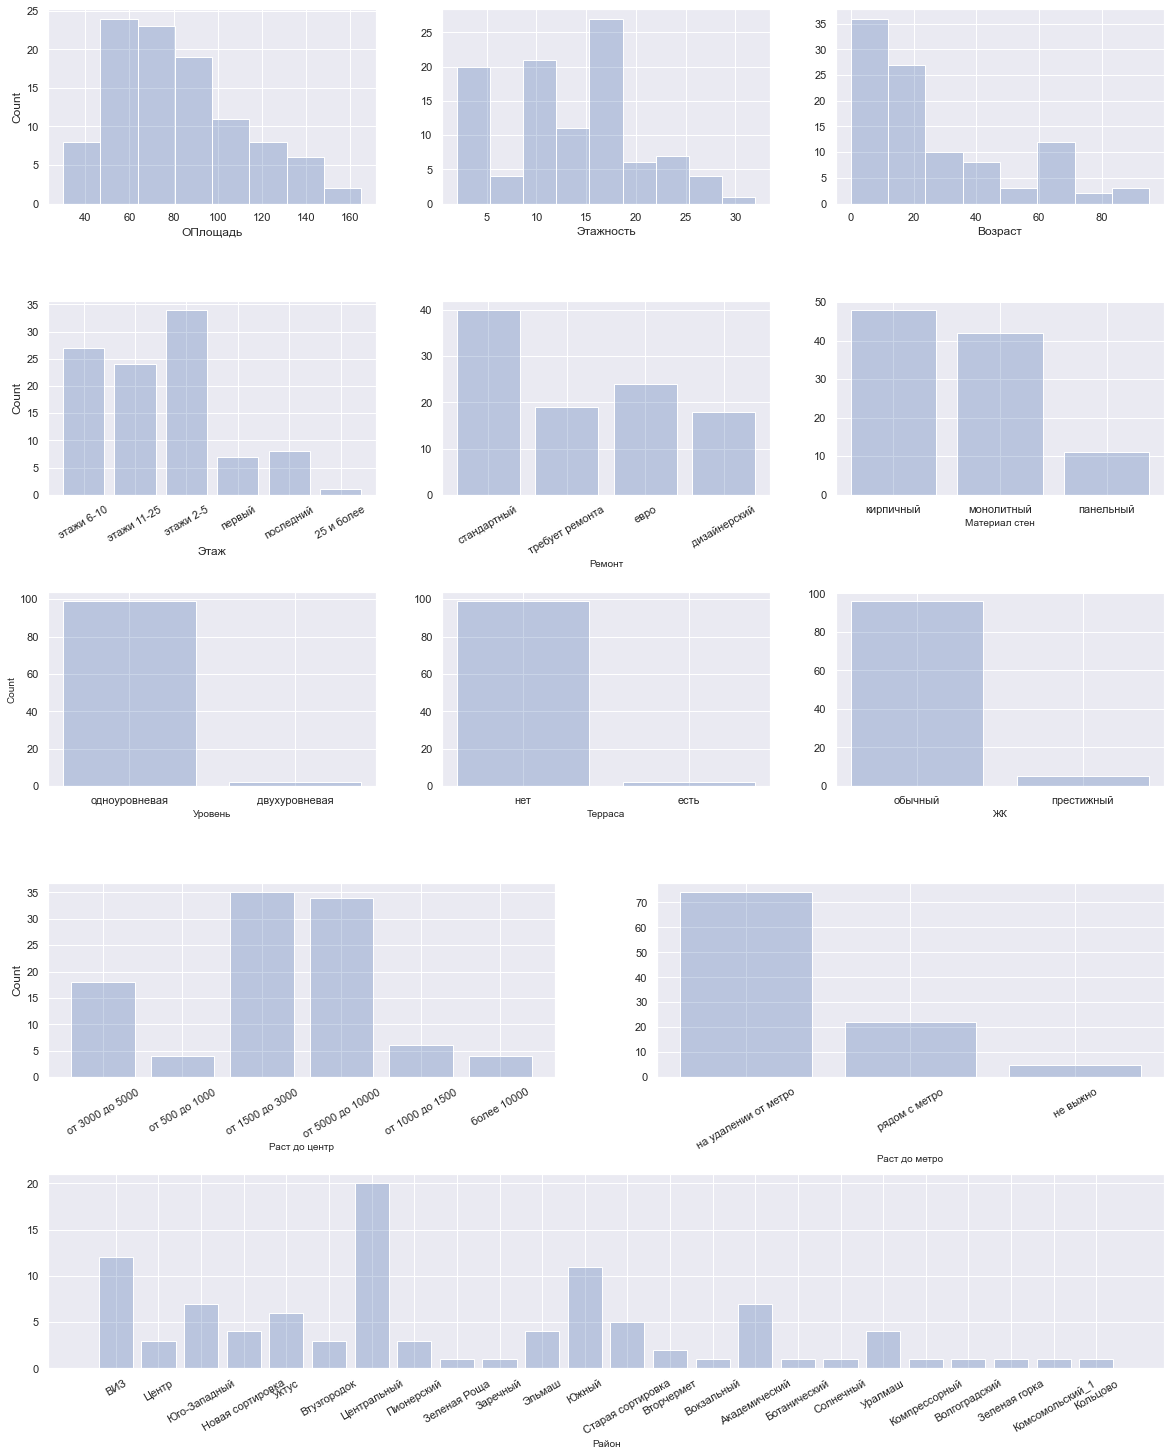

In [31]:
graph(df_3)

# Shap

In [4]:
!pip uninstall -y numpy

Found existing installation: numpy 1.26.0

ERROR: Exception:



Uninstalling numpy-1.26.0:
  Successfully uninstalled numpy-1.26.0


Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 173, in _main
    status = self.run(options, args)
  File "C:\anaconda3\lib\site-packages\pip\_internal\commands\uninstall.py", line 97, in run
    uninstall_pathset.commit()
  File "C:\anaconda3\lib\site-packages\pip\_internal\req\req_uninstall.py", line 436, in commit
    self._moved_paths.commit()
  File "C:\anaconda3\lib\site-packages\pip\_internal\req\req_uninstall.py", line 287, in commit
    save_dir.cleanup()
  File "C:\anaconda3\lib\site-packages\pip\_internal\utils\temp_dir.py", line 184, in cleanup
    rmtree(self._path)
  File "C:\anaconda3\lib\site-packages\pip\_vendor\tenacity\__init__.py", line 326, in wrapped_f
    return self(f, *args, **kw)
  File "C:\anaconda3\lib\site-packages\pip\_vendor\tenacity\__init__.py", line 406, in __call__
    do = self.iter(retry_state=retry_state)
  File "C:\anaconda3\lib\site-packages\pip\_vendor\tenacity\__init__.py", line

In [9]:
!pip list

Package                       Version
----------------------------- --------------------
absl-py                       1.3.0


aggdraw                       1.3.16
aiohttp                       3.8.1
aiosignal                     1.2.0
alabaster                     0.7.12
anaconda-client               1.9.0
anaconda-navigator            2.3.2
anaconda-project              0.10.2
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.6.6
astropy                       5.0.4
asttokens                     2.0.5
astunparse                    1.6.3
async-generator               1.10
async-timeout                 4.0.1
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bamt                

et-xmlfile                    1.1.0
etils                         1.0.0
executing                     0.8.3
fake-useragent                1.1.1
fastjsonschema                2.15.1
feature-engine                1.6.1
filelock                      3.6.0
flake8                        3.9.2
Flask                         1.1.2
flatbuffers                   22.12.6
folium                        0.12.1.post1
fonttools                     4.25.0
frozenlist                    1.2.0
fsspec                        2022.2.0
future                        0.18.2
gast                          0.4.0
gensim                        4.1.2
geographiclib                 1.52
geopy                         2.2.0
glob2                         0.7
gmr                           1.6.2
google-api-core               1.25.1
google-auth                   2.20.0
google-auth-oauthlib          1.0.0
google-cloud-core             1.7.1
google-cloud-storage          1.31.0
google-crc32c                 1.1.2
google-pasta 

In [8]:
!pip install numpy == 1.21.5 #1.21.6   1.25.2

Defaulting to user installation because normal site-packages is not writeable


ERROR: Invalid requirement: '='
Hint: = is not a valid operator. Did you mean == ?


In [1]:
import numpy as np
np.__version__

'1.21.5'

In [16]:
X = df[[
#        'Комнатность_2',
        'ОПлощадь',
#        'LN(ОПлощадь)',
        'КПлощадь_2', 
#        'ЖПлощадь_2',
        'ЖПлощадь_catb', 
#        'Этаж_1',
#        'Этаж_2', 
#        'Этаж_3',
        'Этаж_4',
        'Этажность_1', 
#        'Этажность_2',
        'ГП_3', 
#        'ХВ', 
#        'Санузел_2', 
        'Санузел_3', 
        'Ремонт',
#        'Материал_1', 
        'Материал_2', 
        'Многоуровневая',
        'Терраса',
#        'Раст_центр_1', 
        'Раст_центр_2',
#        'Раст_метро_1', 
        'Раст_метро_2', 
        'Район_2', 
        'ЖК',
        'Вид'
       ]]

Y = df['Цена']

def get_categorical_indicies(X):
    cats = []
    for col in X.columns:
        if is_numeric_dtype(X[col]):
            pass
        else:
            cats.append(col)
    cat_indicies = []
    for col in cats:
        cat_indicies.append(X.columns.get_loc(col))
    return cat_indicies

cat_features = get_categorical_indicies(X)
print(cat_features)

[3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.15, random_state = 0)
#X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, test_size = 0.67, random_state = 42)

In [18]:
print(len(X_train))
print(len(X_test))
#print(len(X_val))

6412
1132


iteritems is deprecated and will be removed in a future version. Use .items instead.


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MAE на обучении: 583832.0247
RMSE на обучении: 891413.894
MAPE на обучении: 0.0894
R2 на обучении: 0.9466
MAE на тесте: 588956.6572
RMSE на тесте: 951284.9255
MAPE на тесте: 0.0894
R2 на тесте: 0.9301
MAE: 584600.9913
RMSE: 900651.5542
MAPE: 0.0894
R2: 0.9445


iteritems is deprecated and will be removed in a future version. Use .items instead.
Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


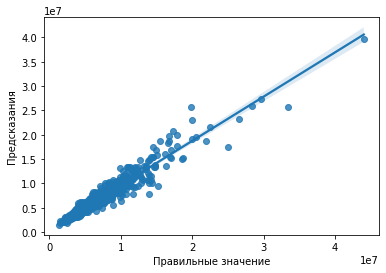

In [19]:
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

catb = CatBoostRegressor(iterations = 2500, #максимальное количество построенных деревьев
                         random_seed = 5, 
                         learning_rate = 0.03, #скорость обучения, определяет насколько быстро или медленно модель будет учиться
                         max_depth = 4, #глубина дерева
                         #boosting_type = 'Ordered', #может дать хорошее качество при малых выборках, работает медленно
                         #l2_leaf_reg = 20, #коэффициент при члене регуляризации L2 функции потерь
                         #bagging_temperature = 1,
                         #random_strength = 1,
                         one_hot_max_size = 45, #не используем one hot encoding, а включаем one_hot_max_size
                         #loss_function = 'MAE', #по умолчанию
                         #eval_metric = 'MAPE', #MAPE
                         od_type = 'Iter', #если модель переобучилась
                         od_wait = 20) #делай остановку через 20 итераций
#если хотим хорошее качество, то уменьшаем learning_rate и увеличиваем iterations.
#если модель слишком рано переобучается, то l2_leaf_reg увеличиваем.

#cat_features = [6, 7, 8, 9, 10, 11]

catb.fit(X_train, Y_train, 
         cat_features = cat_features, #массив с индексами категориальных фичей
         eval_set = (X_test, Y_test),
         verbose = False, 
         plot = True) #включение графика

Ypred = catb.predict(X_test)

pred_1 = catb.predict(X)

pred_train = catb.predict(X_train)
mse_train = mse(Y_train, pred_train)
print("MAE на обучении:", round(mae(Y_train, pred_train), 4))
print("RMSE на обучении:", round(sqrt(mse(Y_train, pred_train)), 4))
print("MAPE на обучении:", round(mape(Y_train, pred_train), 4))
print("R2 на обучении:", round(r2_score(Y_train, pred_train), 4))
print("===============================")

pred_test = catb.predict(X_test)
mse_test = mse(Y_test, pred_test)
print("MAE на тесте:", round(mae(Y_test, pred_test), 4))
print("RMSE на тесте:", round(sqrt(mse(Y_test, pred_test)), 4))
print("MAPE на тесте:", round(mape(Y_test, pred_test), 4))
print("R2 на тесте:", round(r2_score(Y_test, pred_test), 4))
print("===============================")

#pred_val = catb.predict(X_val)
#mse_val = mse(Y_val, pred_val)
#print("MAE на валидации:", round(mae(Y_val, pred_val), 4))
#print("RMSE на валидации:", round(sqrt(mse(Y_val, pred_val)), 4))
#print("MAPE на валидации:", round(mape(Y_val, pred_val), 4))
#print("R2 на валидации:", round(r2_score(Y_val, pred_val), 4))
#print("===============================")

print("MAE:", round(mae(Y, pred_1), 4))
print("RMSE:", round(sqrt(mse(Y, pred_1)), 4))
print("MAPE:", round(mape(Y, pred_1), 4))
print("R2:", round(r2_score(Y, pred_1), 4))

#figure, axis = plt.subplots(ncols = 2, figsize = (15, 7))
#sns.regplot(Y_test, pred_test, ax = axis[0])
#axis[0].set_title("Test")
#axis[0].set_xlabel('Правильные значение')
#axis[0].set_ylabel('Предсказания')
##axis[0].set_xlim(plt.xlim())
##axis[0].set_ylim(plt.ylim())

#sns.regplot(Y_val, pred_val, ax = axis[1])
#axis[1].set_title("Val")
#axis[1].set_xlabel('Правильные значение')
#axis[1].set_ylabel('Предсказания')
##axis[1].set_xlim(plt.xlim())
##axis[1].set_ylim(plt.ylim())

sns.regplot(Y_test, pred_test)
plt.xlabel('Правильные значение')
plt.ylabel('Предсказания')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.show()

In [3]:
import shap
shap.initjs()

In [20]:
Col =  [
#       'Комнатность_2',
        'ОПлощадь',
        'КПлощадь_2', 
#        'ЖПлощадь_2',
        'ЖПлощадь_catb', 
#        'Этаж_1',
#        'Этаж_2', 
#        'Этаж_3',
        'Этаж_4',
        'Этажность_1', 
#        'Этажность_2',
        'ГП_3', 
#        'ХВ', 
#        'Санузел_2', 
        'Санузел_3', 
        'Ремонт',
#        'Материал_1', 
        'Материал_2', 
        'Многоуровневая',
        'Терраса',
#        'Раст_центр_1', 
        'Раст_центр_2',
#        'Раст_метро_1', 
        'Раст_метро_2', 
        'Район_2', 
        'ЖК',
        'Вид'
       ]

In [34]:
explainer = shap.TreeExplainer(catb)
shap_values = explainer.shap_values(X_test)

iteritems is deprecated and will be removed in a future version. Use .items instead.


In [35]:
df['Цена'].mean()

6309105.56588017

In [36]:
shap_cols = [x + '_shap' for x in X_test]
shap_cols

['ОПлощадь_shap',
 'КПлощадь_2_shap',
 'ЖПлощадь_catb_shap',
 'Этаж_4_shap',
 'Этажность_1_shap',
 'ГП_3_shap',
 'Санузел_3_shap',
 'Ремонт_shap',
 'Материал_2_shap',
 'Многоуровневая_shap',
 'Терраса_shap',
 'Раст_центр_2_shap',
 'Раст_метро_2_shap',
 'Район_2_shap',
 'ЖК_shap',
 'Вид_shap']

In [37]:
shap_values_df = pd.DataFrame(shap_values, columns = shap_cols)

In [38]:
shap_values_df

,ОПлощадь_shap,КПлощадь_2_shap,ЖПлощадь_catb_shap,Этаж_4_shap,Этажность_1_shap,ГП_3_shap,Санузел_3_shap,Ремонт_shap,Материал_2_shap,Многоуровневая_shap,Терраса_shap,Раст_центр_2_shap,Раст_метро_2_shap,Район_2_shap,ЖК_shap,Вид_shap
0,6.068999e+05,-319972.789221,188358.245160,18541.787021,16712.086948,-427929.333214,-17827.609761,-315600.792594,-33463.739161,-26.616759,-760.350264,-467034.196993,-155863.339988,-171531.278964,-43141.456372,-3169.290089
1,-1.022566e+06,-234583.570730,-74933.433851,19304.003378,66534.305060,-380841.634649,-5972.900852,-160413.257893,-23312.085861,-161.551563,-826.466634,-422279.876021,359222.669885,-63894.805769,-40523.786436,-3558.156530
2,1.408462e+06,-317710.468248,165737.966754,-183047.898552,-197707.065625,-448230.692430,17051.573599,193038.636082,-4735.751537,100.996172,-373.229003,-516415.564004,-176155.353266,-65574.825792,-52958.839474,-3397.809604
3,-9.851000e+05,-277239.890076,-42039.215062,25144.950659,-189756.506280,-348283.089594,5719.498637,-143912.383578,-9724.595567,-33.938633,-869.581390,-408010.454090,-114988.092611,-56111.355441,-30319.257057,-3085.532701
4,-1.565454e+06,-247585.473593,-264895.985646,23737.979505,125051.288703,236558.967169,5152.928253,-175316.303628,31624.753681,-161.551563,-973.527082,837337.832855,-131727.111737,-75848.403723,-38255.917887,-3678.026236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1127,-2.215476e+06,-424188.243043,-609352.444020,28941.948928,285951.652564,447546.651573,2154.909055,-265120.205173,28133.185310,-161.551563,-843.103354,816254.480256,-137716.391871,5159.962535,-39714.201385,-2875.353059
1128,-6.762407e+05,-472940.714130,159958.346909,22800.506139,8671.836355,-515226.139542,-6707.477698,-329579.979755,-15089.192874,-161.551563,-746.154258,432357.359673,-138725.944483,814410.342789,-39960.861129,-3056.963767
1129,6.021288e+05,-105182.372249,182251.618673,24385.274301,14146.720399,-419546.622693,-18477.463744,189269.279785,-30725.647715,-161.551563,-842.694856,-493780.483529,-155828.658195,-70202.156926,-42058.831316,-3584.312254
1130,3.798879e+06,499549.882305,377667.635492,-258222.378598,37413.650075,293159.227886,32970.477654,231757.912723,6770.157119,-26.616759,-304.996246,-720032.227827,-272083.361189,-81210.928271,-96483.703861,-3699.602930


In [39]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[1127,:], X.iloc[1127,:])
#изменяя shap_values[0,:] и X.iloc[0,:] можно по строкам смотреть влияние факторов

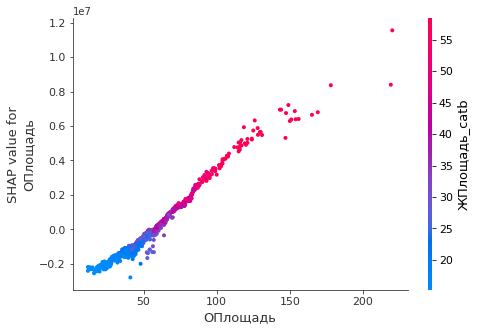

In [40]:
#shap.dependence_plot("ОПлощадь", shap_values, X, interaction_index = 'ОПлощадь') 
shap.dependence_plot("ОПлощадь", shap_values, X_test) 

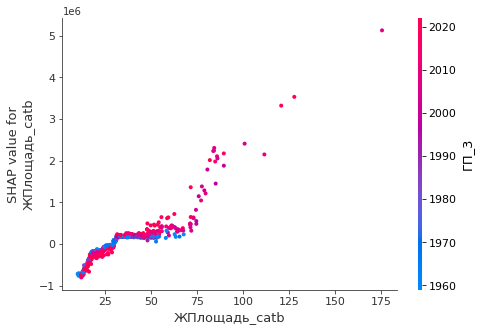

In [41]:
shap.dependence_plot("ЖПлощадь_catb", shap_values, X_test)

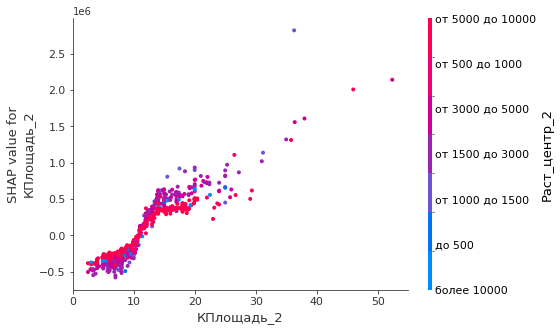

In [42]:
shap.dependence_plot("КПлощадь_2", shap_values, X_test)

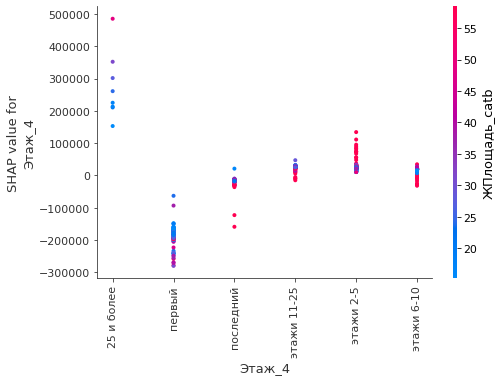

In [43]:
shap.dependence_plot("Этаж_4", shap_values, X_test)

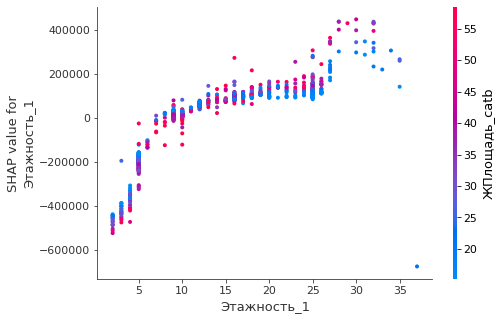

In [44]:
shap.dependence_plot("Этажность_1", shap_values, X_test)

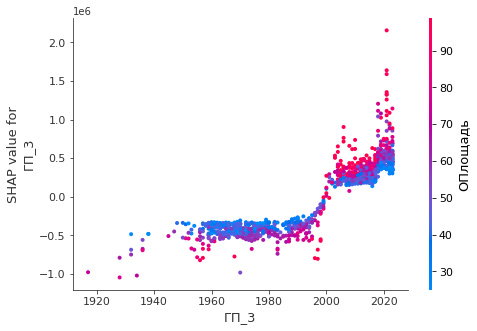

In [45]:
shap.dependence_plot("ГП_3", shap_values, X_test)

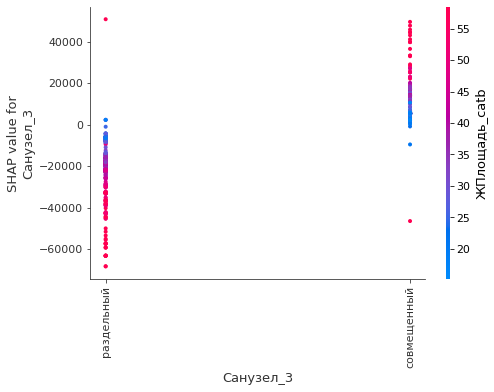

In [46]:
shap.dependence_plot("Санузел_3", shap_values, X_test)

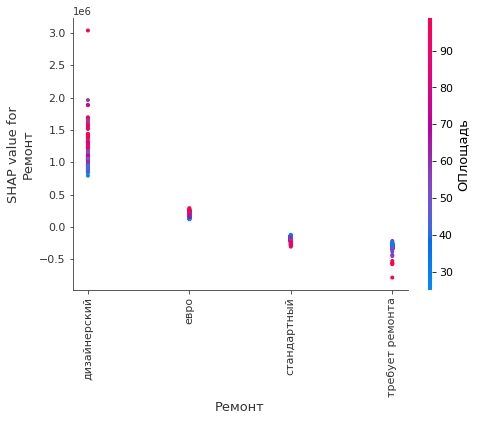

In [47]:
shap.dependence_plot("Ремонт", shap_values, X_test)

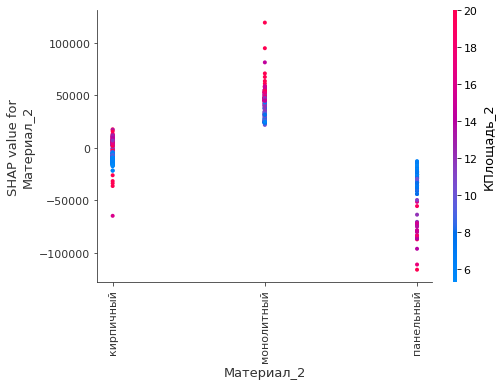

In [48]:
shap.dependence_plot("Материал_2", shap_values, X_test)

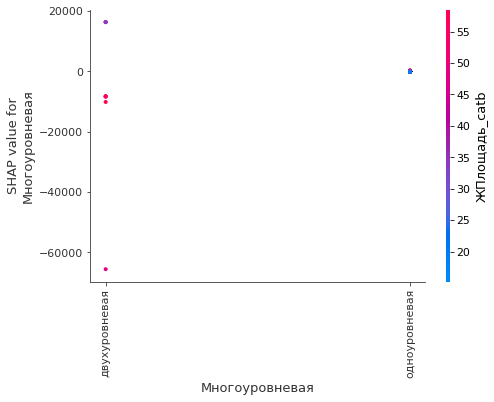

In [49]:
shap.dependence_plot("Многоуровневая", shap_values, X_test)

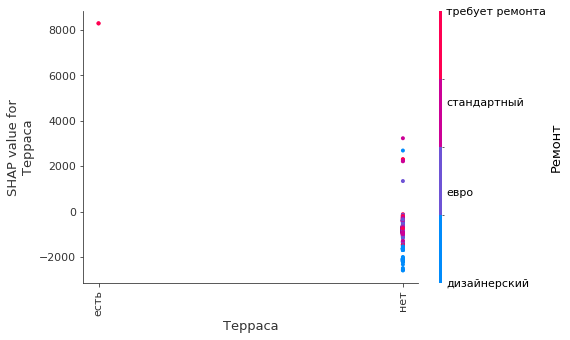

In [50]:
shap.dependence_plot("Терраса", shap_values, X_test)

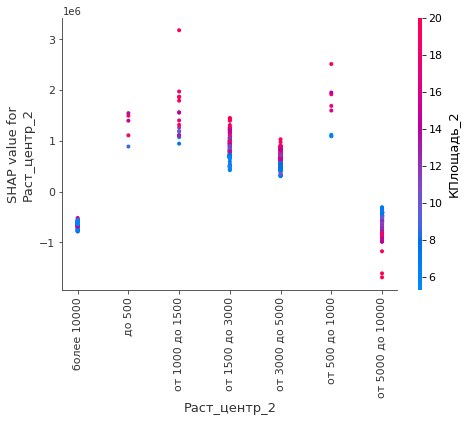

In [51]:
shap.dependence_plot("Раст_центр_2", shap_values, X_test)

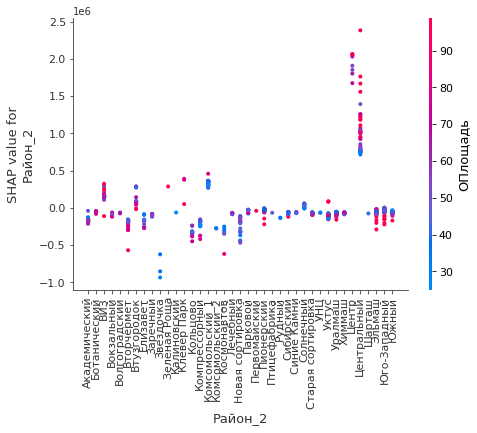

In [52]:
shap.dependence_plot("Район_2", shap_values, X_test)

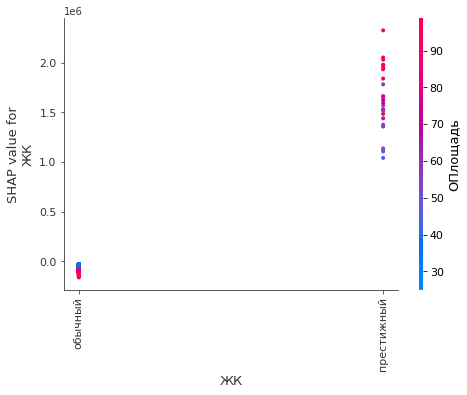

In [53]:
shap.dependence_plot("ЖК", shap_values, X_test)

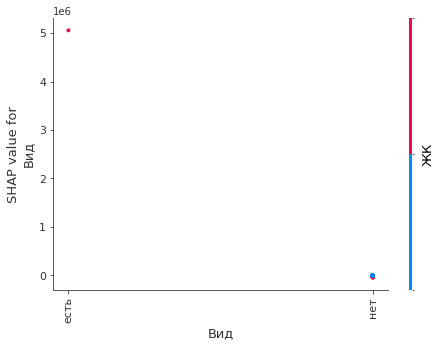

In [54]:
shap.dependence_plot("Вид", shap_values, X_test)

# Анализ ошибки по сегментам

# Элитные

In [8]:
df_pr = df[df['ЖК'] == 'престижный']
df_pr

,Цена,Прогноз_catb,Прогноз_NN,Прогноз_MLP,Прогноз_Stack,Mean_catb_NN,Балл_2,Метка,err,MAE,...,Этаж,Пассажирский лифт,Двор,Парковка,Высота потолков,В доме,Грузовой лифт,Техника,Тёплый пол,Запланирован снос
16,12000000,1.419025e+07,13707824.0,1.275732e+07,1.428789e+07,1.394904e+07,11.823957,0,25138.101679,-2.190250e+06,...,18 из 26,1,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
59,30000000,2.679477e+07,28438934.0,2.575254e+07,2.635680e+07,2.761685e+07,11.673993,1,104492.375136,3.205234e+06,...,5 из 14,1,закрытая территория,NaN,NaN,NaN,2,NaN,NaN,NaN
162,17000000,1.625938e+07,14905791.0,1.636258e+07,1.600031e+07,1.558259e+07,12.148325,0,30865.183162,7.406150e+05,...,8 из 30,3,"закрытая территория, детская площадка, спорти...","подземная, наземная многоуровневая",NaN,NaN,1,кондиционер,NaN,NaN
215,7890000,8.738002e+06,9606708.0,1.061616e+07,9.661480e+06,9.172355e+06,11.249567,0,8368.138972,-8.480019e+05,...,2 из 34,1,закрытая территория,NaN,NaN,NaN,NaN,"холодильник, стиральная машина",NaN,NaN
316,23000000,2.151713e+07,21633024.0,2.060697e+07,2.028901e+07,2.157508e+07,12.294529,1,137830.637286,1.482873e+06,...,23 из 31,3,"закрытая территория, детская площадка, спорти...",подземная,2.8 м,NaN,1,"холодильник, посудомоечная машина",есть,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7511,6735000,7.374549e+06,7689878.0,7.891316e+06,6.919268e+06,7.532213e+06,12.065432,0,-10291.439040,-6.395487e+05,...,20 из 20,2,"закрытая территория, детская площадка, спорти...","подземная, за шлагбаумом во дворе",NaN,NaN,1,NaN,NaN,NaN
7514,13990000,1.167980e+07,12533269.0,1.305421e+07,1.060546e+07,1.210654e+07,11.635898,1,96824.905373,2.310198e+06,...,7 из 10,1,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
7521,15500000,1.737338e+07,18636728.0,1.895346e+07,1.888880e+07,1.800505e+07,11.401367,0,18191.108412,-1.873382e+06,...,2 из 11,2,"закрытая территория, детская площадка, спорти...",NaN,NaN,NaN,1,NaN,NaN,NaN
7528,10020000,1.159953e+07,11010149.0,1.113776e+07,1.139555e+07,1.130484e+07,11.732045,0,-16696.400326,-1.579526e+06,...,18 из 20,2,"закрытая территория, детская площадка, спорти...","подземная, за шлагбаумом во дворе",2.5 м,газ,нет,NaN,NaN,NaN


Всего: 215
MAE (2 млн): 59
MAE (2 млн): 0.274


C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


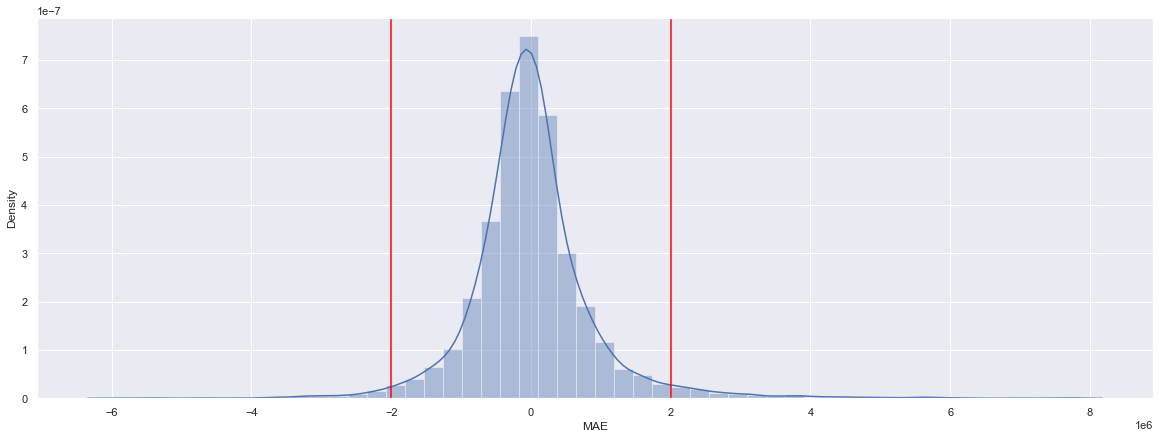

In [9]:
g = 2000000

print('Всего:', len(df_pr['MAE']))
print('MAE (2 млн):', len(df_pr[(df_pr['MAE'] < -g) | (df_pr['MAE'] > g)]))
print('MAE (2 млн):', round(len(df_pr[(df_pr['MAE'] < -g) | (df_pr['MAE'] > g)]) / len(df_pr['MAE']), 3))

sns.set()
plt.figure(figsize = (20, 7))
sns.distplot(df['MAE'])

plt.axvline(-g, color = 'red')
plt.axvline(g, color = 'red')

Всего: 215
MAE (2 млн): 15
MAE (2 млн): 0.07


C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


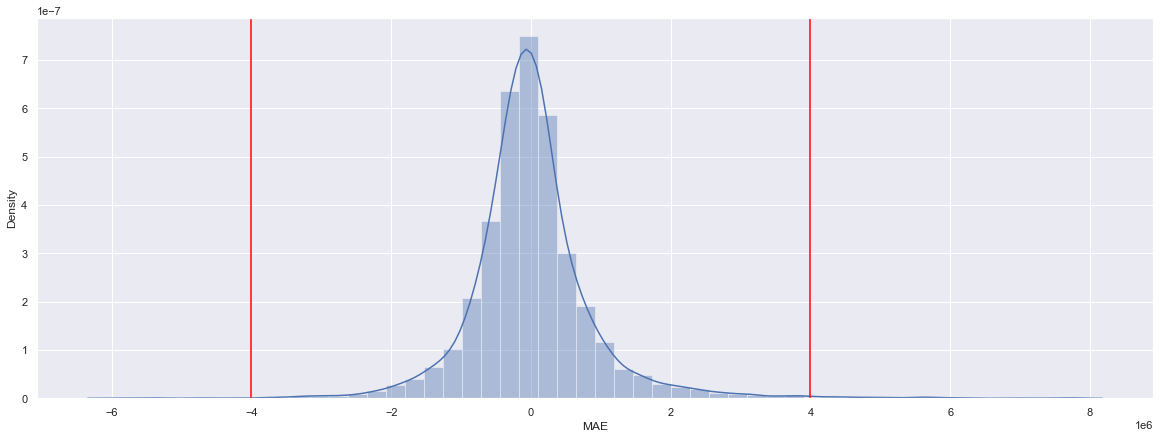

In [10]:
g = 4000000

print('Всего:', len(df_pr['MAE']))
print('MAE (2 млн):', len(df_pr[(df_pr['MAE'] < -g) | (df_pr['MAE'] > g)]))
print('MAE (2 млн):', round(len(df_pr[(df_pr['MAE'] < -g) | (df_pr['MAE'] > g)]) / len(df_pr['MAE']), 3))

sns.set()
plt.figure(figsize = (20, 7))
sns.distplot(df['MAE'])

plt.axvline(-g, color = 'red')
plt.axvline(g, color = 'red')

Всего: 215
MAPE (0.25): 5
MAPE (0.25): 0.023


C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


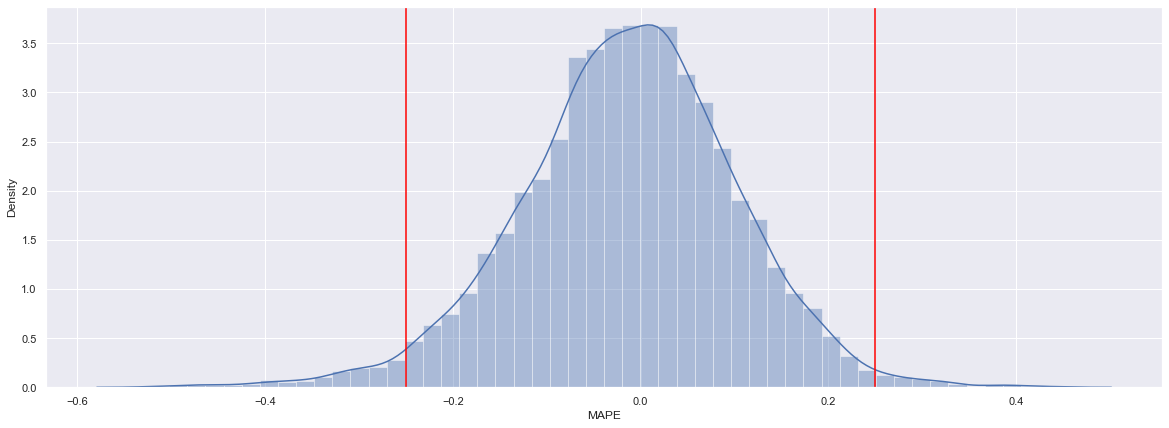

In [12]:
g = 0.25

print('Всего:', len(df_pr['MAPE']))
print('MAPE (0.25):', len(df_pr[(df_pr['MAPE'] < -g) | (df_pr['MAPE'] > g)]))
print('MAPE (0.25):', round(len(df_pr[(df_pr['MAPE'] < -g) | (df_pr['MAPE'] > g)]) / len(df_pr['MAPE']), 3))

sns.set()
plt.figure(figsize = (20, 7))
sns.distplot(df['MAPE'])

plt.axvline(-g, color = 'red')
plt.axvline(g, color = 'red')

In [13]:
df_pr_3 = df_pr[(df_pr['MAE'] < -2000000) | (df_pr['MAE'] > 2000000)]
df_pr_3 = df_pr_3[(df_pr_3['MAPE'] < -0.25) | (df_pr_3['MAPE'] > 0.25)]
len(df_pr_3)

5

# С видом на пруд и сити

In [15]:
df_v = df[df['Вид'] == 'есть']
df_v

,Цена,Прогноз_catb,Прогноз_NN,Прогноз_MLP,Прогноз_Stack,Mean_catb_NN,Балл_2,Метка,err,MAE,...,Этаж,Пассажирский лифт,Двор,Парковка,Высота потолков,В доме,Грузовой лифт,Техника,Тёплый пол,Запланирован снос
1908,30900000,3.111748e+07,26087562.0,2.497366e+07,2.581342e+07,2.860252e+07,11.373516,1,61136.362761,-2.174815e+05,...,14 из 17,2,"закрытая территория, детская площадка, спорти...","подземная, за шлагбаумом во дворе",2.7 м,NaN,NaN,NaN,NaN,NaN
2116,25000000,2.404657e+07,18944604.0,1.829041e+07,1.665809e+07,2.149559e+07,11.300966,1,200678.478319,9.534289e+05,...,4 из 13,1,"закрытая территория, детская площадка, спорти...","подземная, за шлагбаумом во дворе",2540 м,консьерж,2,NaN,NaN,NaN
3656,16700000,1.972703e+07,16937676.0,1.630015e+07,1.467141e+07,1.833235e+07,11.645157,1,125065.255324,-3.027032e+06,...,11 из 13,2,NaN,NaN,2.7 м,консьерж,2,NaN,NaN,NaN
4197,9980000,1.024160e+07,9322529.0,9.460906e+06,8.770268e+06,9.782062e+06,9.499105,0,20435.384189,-2.615953e+05,...,4 из 14,1,"закрытая территория, детская площадка, спорти...",за шлагбаумом во дворе,NaN,NaN,NaN,NaN,NaN,NaN
6425,6610000,6.720118e+06,4796195.0,4.885031e+06,4.803855e+06,5.758157e+06,9.824870,1,81765.931183,-1.101183e+05,...,8 из 9,1,детская площадка,открытая во дворе,2.7 м,консьерж,2,"стиральная машина, посудомоечная машина, водо...",NaN,NaN
7033,29900000,2.720090e+07,19878310.0,1.925930e+07,2.137502e+07,2.353961e+07,10.855669,1,151381.237682,2.699099e+06,...,10 из 17,2,"закрытая территория, детская площадка, спорти...","подземная, за шлагбаумом во дворе",NaN,консьерж,1,NaN,NaN,NaN


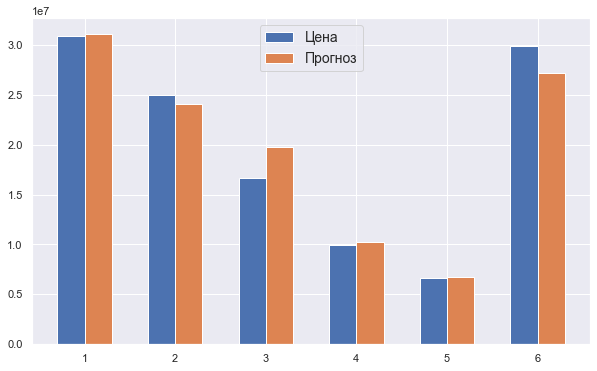

In [35]:
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot()

x = np.arange(1, 7, 1)
w = 0.3
ax.bar(x - w/2, df_v['Цена'], width = w, label = 'Цена')
ax.bar(x + w/2, df_v['Прогноз_catb'], width = w, label = 'Прогноз')
ax.legend(prop = {'size': 14})

# Двухуровневые

In [36]:
df_dv = df[df['Многоуровневая'] == 'двухуровневая']
df_dv

,Цена,Прогноз_catb,Прогноз_NN,Прогноз_MLP,Прогноз_Stack,Mean_catb_NN,Балл_2,Метка,err,MAE,...,Этаж,Пассажирский лифт,Двор,Парковка,Высота потолков,В доме,Грузовой лифт,Техника,Тёплый пол,Запланирован снос
14,14500000,1.743776e+07,17749734.0,1.763468e+07,1.880007e+07,1.759375e+07,10.120887,0,-42028.038581,-2.937759e+06,...,8 из 10,2,"закрытая территория, детская площадка",подземная,3.5 м,NaN,1,NaN,NaN,NaN
254,6250000,7.368358e+06,7196913.0,7.138203e+06,6.826646e+06,7.282635e+06,9.949227,0,-31857.903711,-1.118358e+06,...,4 из 4,нет,"закрытая территория, детская площадка",открытая во дворе,NaN,NaN,1,NaN,NaN,NaN
461,5800000,5.965157e+06,6298721.5,6.230003e+06,5.601880e+06,6.131939e+06,9.659957,0,-20006.801614,-1.651574e+05,...,4 из 4,нет,"закрытая территория, детская площадка, спорти...",NaN,2.5 м,NaN,NaN,NaN,NaN,NaN
526,7000000,6.595071e+06,7116556.0,6.745273e+06,7.028110e+06,6.855814e+06,10.080759,0,-15135.046702,4.049287e+05,...,1 из 16,NaN,закрытая территория,"подземная, открытая во дворе",NaN,консьерж,1,NaN,NaN,NaN
613,9150000,9.266265e+06,9417779.0,8.080375e+06,8.969412e+06,9.342022e+06,9.688523,0,19682.312168,-1.162646e+05,...,9 из 10,1,закрытая территория,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7195,12800000,1.187234e+07,11878870.0,1.171136e+07,1.253014e+07,1.187561e+07,9.868241,0,3416.367556,9.276593e+05,...,25 из 26,1,"детская площадка, спортивная площадка","подземная, открытая во дворе, за шлагбаумом в...",3 м,NaN,1,NaN,NaN,NaN
7306,6375000,7.317904e+06,7249115.0,6.812331e+06,7.045995e+06,7.283509e+06,9.638259,0,-24583.851755,-9.429036e+05,...,5 из 9,1,"детская площадка, спортивная площадка",открытая во дворе,NaN,NaN,NaN,NaN,NaN,NaN
7335,15215000,1.672536e+07,17946984.0,1.791870e+07,1.708223e+07,1.733617e+07,10.234021,0,-42220.428133,-1.510362e+06,...,6 из 9,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7406,15000000,1.251453e+07,13870764.0,1.343225e+07,1.237988e+07,1.319265e+07,10.366601,0,1011.022211,2.485470e+06,...,17 из 17,1,закрытая территория,NaN,3 м,NaN,1,посудомоечная машина,есть,NaN


Всего: 72
MAE (2 млн): 10
MAE (2 млн): 0.139


C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


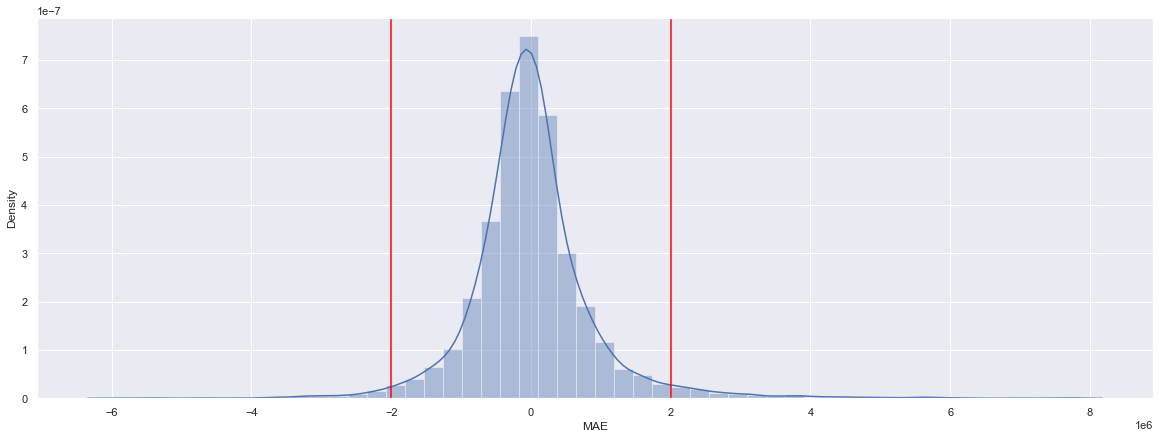

In [37]:
g = 2000000

print('Всего:', len(df_dv['MAE']))
print('MAE (2 млн):', len(df_dv[(df_dv['MAE'] < -g) | (df_dv['MAE'] > g)]))
print('MAE (2 млн):', round(len(df_dv[(df_dv['MAE'] < -g) | (df_dv['MAE'] > g)]) / len(df_dv['MAE']), 3))

sns.set()
plt.figure(figsize = (20, 7))
sns.distplot(df['MAE'])

plt.axvline(-g, color = 'red')
plt.axvline(g, color = 'red')

Всего: 72
MAE (2 млн): 0
MAE (2 млн): 0.0


C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


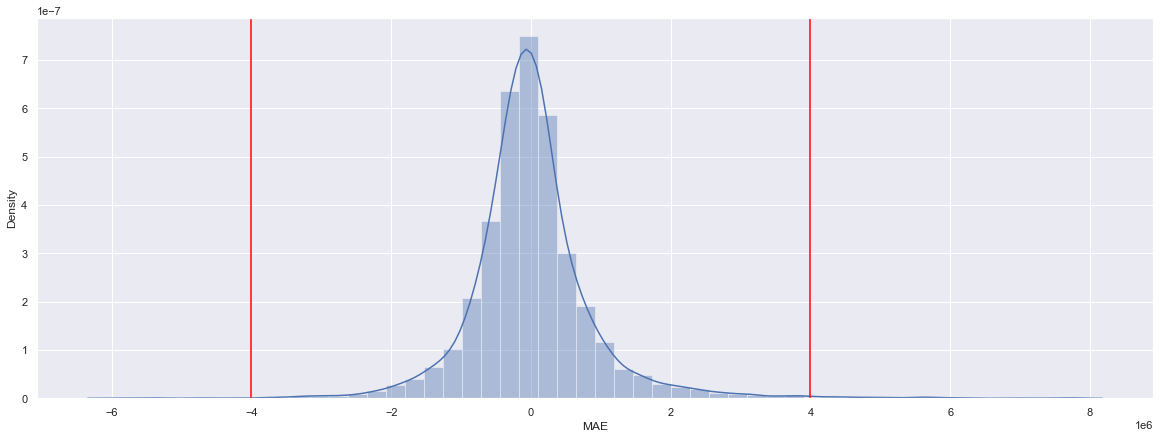

In [38]:
g = 4000000

print('Всего:', len(df_dv['MAE']))
print('MAE (2 млн):', len(df_dv[(df_dv['MAE'] < -g) | (df_dv['MAE'] > g)]))
print('MAE (2 млн):', round(len(df_dv[(df_dv['MAE'] < -g) | (df_dv['MAE'] > g)]) / len(df_dv['MAE']), 3))

sns.set()
plt.figure(figsize = (20, 7))
sns.distplot(df['MAE'])

plt.axvline(-g, color = 'red')
plt.axvline(g, color = 'red')

Всего: 72
MAPE (0.25): 4
MAPE (0.25): 0.056


C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


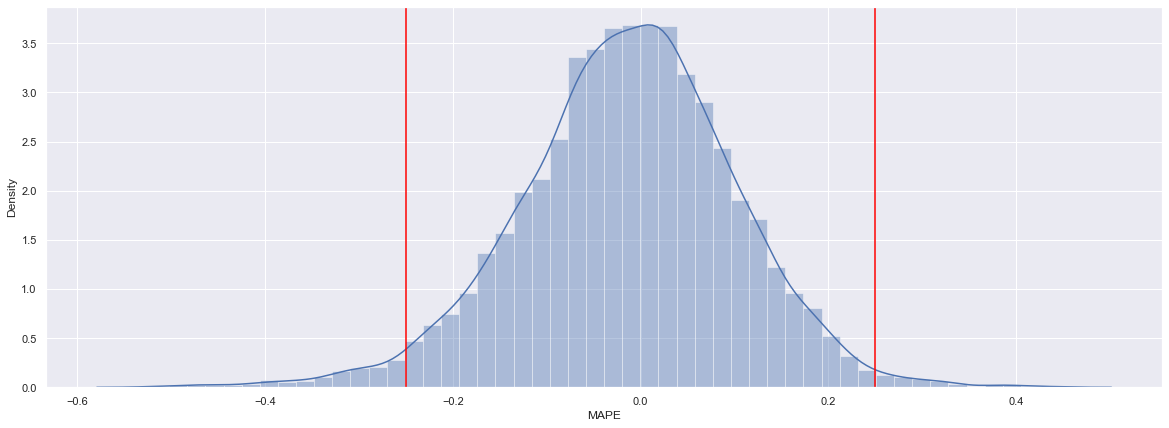

In [39]:
g = 0.25

print('Всего:', len(df_dv['MAPE']))
print('MAPE (0.25):', len(df_dv[(df_dv['MAPE'] < -g) | (df_dv['MAPE'] > g)]))
print('MAPE (0.25):', round(len(df_dv[(df_dv['MAPE'] < -g) | (df_dv['MAPE'] > g)]) / len(df_dv['MAPE']), 3))

sns.set()
plt.figure(figsize = (20, 7))
sns.distplot(df['MAPE'])

plt.axvline(-g, color = 'red')
plt.axvline(g, color = 'red')

In [41]:
df_dv_3 = df_dv[(df_dv['MAE'] < -2000000) | (df_dv['MAE'] > 2000000)]
df_dv_3 = df_dv[(df_dv['MAPE'] < -0.25) | (df_dv['MAPE'] > 0.25)]
len(df_dv_3)

4

# С террасой

In [42]:
df_t = df[df['Терраса'] == 'есть']
df_t

,Цена,Прогноз_catb,Прогноз_NN,Прогноз_MLP,Прогноз_Stack,Mean_catb_NN,Балл_2,Метка,err,MAE,...,Этаж,Пассажирский лифт,Двор,Парковка,Высота потолков,В доме,Грузовой лифт,Техника,Тёплый пол,Запланирован снос
14,14500000,1.743776e+07,17749734.0,1.763468e+07,1.880007e+07,1.759375e+07,10.120887,0,-42028.038581,-2.937759e+06,...,8 из 10,2,"закрытая территория, детская площадка",подземная,3.5 м,NaN,1,NaN,NaN,NaN
711,5100000,6.054120e+06,9296759.0,6.235018e+06,8.443517e+06,7.675440e+06,10.516319,0,-34881.426960,-9.541201e+05,...,2 из 20,4,"закрытая территория, детская площадка, спорти...","подземная, открытая во дворе",NaN,NaN,NaN,NaN,NaN,NaN
1851,8600000,8.820796e+06,9507809.0,9.878538e+06,9.238547e+06,9.164302e+06,10.445708,0,1527.926202,-2.207956e+05,...,2 из 25,1,"закрытая территория, детская площадка, спорти...","подземная, за шлагбаумом во дворе",NaN,NaN,1,NaN,NaN,NaN
1884,15580000,1.731423e+07,17217398.0,1.723177e+07,1.692399e+07,1.726581e+07,10.006336,0,-33149.326197,-1.734231e+06,...,6 из 7,2,"закрытая территория, детская площадка",подземная,NaN,NaN,нет,NaN,NaN,NaN
2029,9990000,1.320315e+07,11217247.0,1.165015e+07,1.352057e+07,1.221020e+07,10.045800,0,-32918.334664,-3.213147e+06,...,8 из 8,2,"закрытая территория, детская площадка",подземная,2.7 м,NaN,NaN,NaN,NaN,NaN
2045,14910000,1.556322e+07,16964746.0,1.688964e+07,1.666364e+07,1.626398e+07,9.999836,0,-33315.108875,-6.532185e+05,...,6 из 7,2,"закрытая территория, детская площадка",подземная,NaN,NaN,NaN,NaN,NaN,NaN
2637,18600000,1.484882e+07,12766341.0,1.234842e+07,1.150513e+07,1.380758e+07,10.432723,1,58885.082489,3.751179e+06,...,1 из 7,1,закрытая территория,NaN,NaN,газ,NaN,NaN,NaN,NaN
2914,9190000,7.322978e+06,8075910.0,8.613828e+06,7.951603e+06,7.699444e+06,10.051136,0,27467.362292,1.867022e+06,...,8 из 8,2,"закрытая территория, детская площадка",подземная,3.5 м,NaN,1,NaN,NaN,NaN
3050,25000790,2.570722e+07,24408898.0,2.474928e+07,2.733145e+07,2.505806e+07,10.637388,0,-3376.050790,-7.064289e+05,...,26 из 27,2,"закрытая территория, детская площадка, спорти...","подземная, открытая во дворе",NaN,NaN,1,NaN,NaN,NaN
3168,12800000,1.328809e+07,14201985.0,1.406177e+07,1.435685e+07,1.374504e+07,9.904186,0,-25816.818670,-4.880878e+05,...,1 из 8,1,NaN,NaN,2.5 м,газ,нет,NaN,NaN,NaN


Всего: 20
MAE (2 млн): 7
MAE (2 млн): 0.35


C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


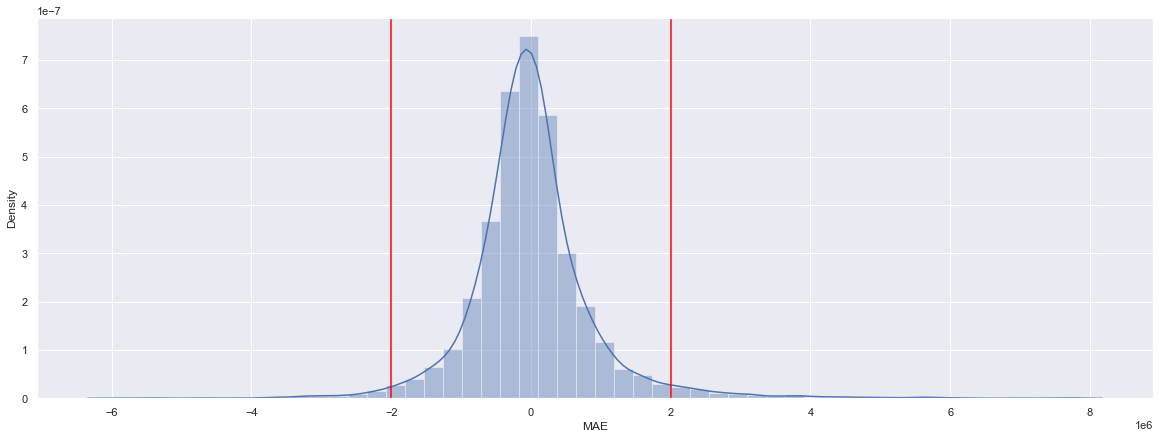

In [43]:
g = 2000000

print('Всего:', len(df_t['MAE']))
print('MAE (2 млн):', len(df_t[(df_t['MAE'] < -g) | (df_t['MAE'] > g)]))
print('MAE (2 млн):', round(len(df_t[(df_t['MAE'] < -g) | (df_t['MAE'] > g)]) / len(df_t['MAE']), 3))

sns.set()
plt.figure(figsize = (20, 7))
sns.distplot(df['MAE'])

plt.axvline(-g, color = 'red')
plt.axvline(g, color = 'red')

Всего: 20
MAE (2 млн): 1
MAE (2 млн): 0.05


C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


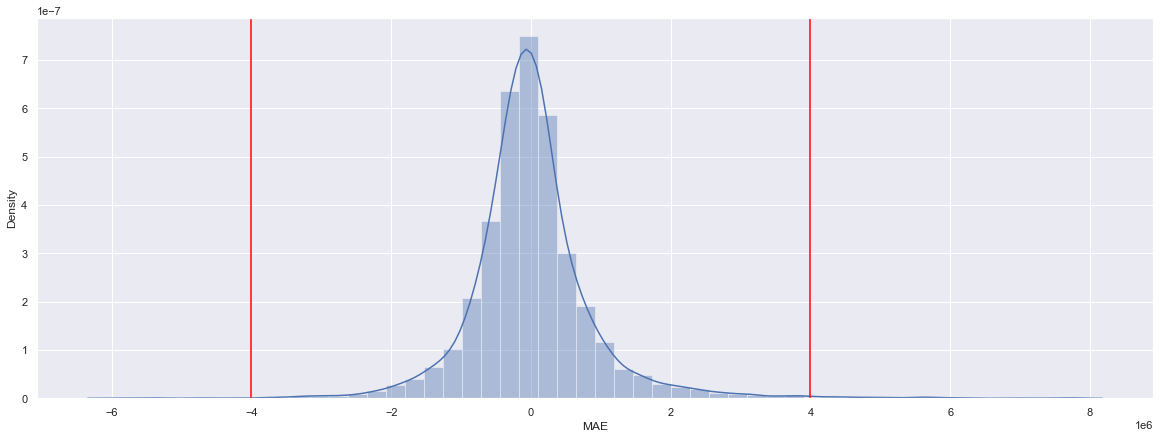

In [44]:
g = 4000000

print('Всего:', len(df_t['MAE']))
print('MAE (2 млн):', len(df_t[(df_t['MAE'] < -g) | (df_t['MAE'] > g)]))
print('MAE (2 млн):', round(len(df_t[(df_t['MAE'] < -g) | (df_t['MAE'] > g)]) / len(df_t['MAE']), 3))

sns.set()
plt.figure(figsize = (20, 7))
sns.distplot(df['MAE'])

plt.axvline(-g, color = 'red')
plt.axvline(g, color = 'red')

Всего: 20
MAPE (0.25): 2
MAPE (0.25): 0.1


C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


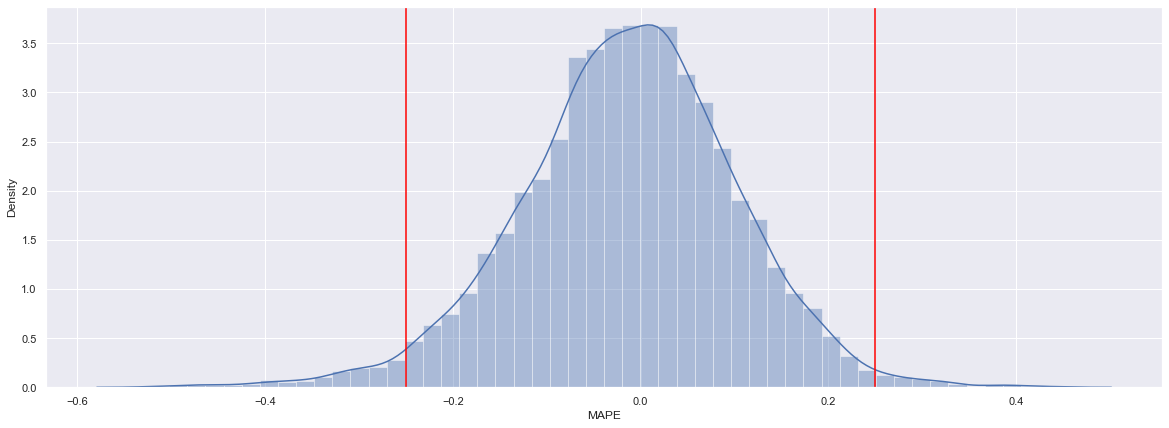

In [45]:
g = 0.25

print('Всего:', len(df_t['MAPE']))
print('MAPE (0.25):', len(df_t[(df_t['MAPE'] < -g) | (df_t['MAPE'] > g)]))
print('MAPE (0.25):', round(len(df_t[(df_t['MAPE'] < -g) | (df_t['MAPE'] > g)]) / len(df_t['MAPE']), 3))

sns.set()
plt.figure(figsize = (20, 7))
sns.distplot(df['MAPE'])

plt.axvline(-g, color = 'red')
plt.axvline(g, color = 'red')

In [46]:
df_t_3 = df_t[(df_t['MAE'] < -2000000) | (df_t['MAE'] > 2000000)]
df_t_3 = df_t[(df_t['MAPE'] < -0.25) | (df_t['MAPE'] > 0.25)]
len(df_t_3)

2

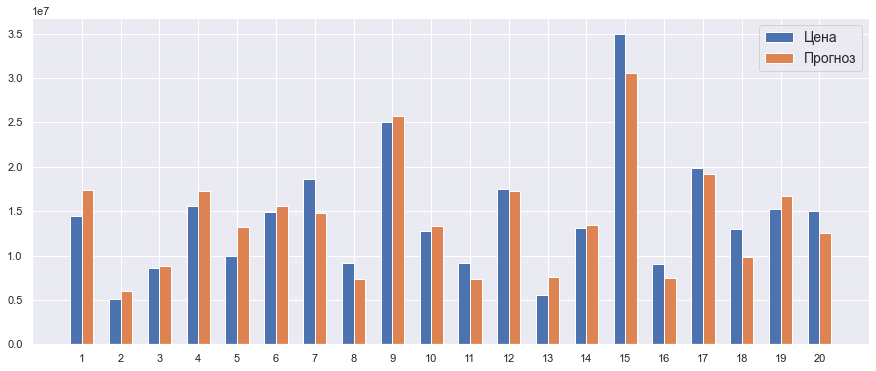

In [58]:
fig = plt.figure(figsize = (15, 6))
ax = fig.add_subplot()

x = np.arange(1, 21, 1)
w = 0.3
ax.bar(x - w/2, df_t['Цена'], width = w, label = 'Цена')
ax.bar(x + w/2, df_t['Прогноз_catb'], width = w, label = 'Прогноз')
ax.legend(prop = {'size': 14})
x_ticks = x
x_labels = x
plt.xticks (ticks = x_ticks, labels = x_labels);